In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [23]:
# Load dataset
mammogram = pd.read_csv('mammogram_dataset.csv')

In [24]:
mammogram.head(10)

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1
5,4,65,1,-100000,3,0
6,4,70,-100000,-100000,3,0
7,5,42,1,-100000,3,0
8,5,57,1,5,3,1
9,5,60,-100000,5,1,1


In [305]:
# Handling missing values
# In this dataset, missing values can be observed as -100000
# Since our program can't really detect -100000 as a missing value as it might be read as a normal value, we are marking them
# with 'NaN' value using numpy.replace
mammogram[['BI_RADS_assessment', 'age', 'shape', 'margin', 'density', 'severity']] = \
    mammogram[['BI_RADS_assessment', 'age', 'shape', 'margin', 'density', 'severity']].replace(-100000, np.nan)
# Hence, we now are able to check how many missing values are there for each attribute
print(mammogram.isnull().sum())

BI_RADS_assessment     2
age                    5
shape                 31
margin                48
density               76
severity               0
dtype: int64


In [26]:
# Observe dataset
mammogram.head(10)

,BI_RADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


In [7]:
# Our program should now be able to replace those missing values, in this case we are
# replacing it with mean values for each column/attribute
mammogram.fillna(mammogram.mean(), inplace=True)
# Check missing values again just to be sure
print(mammogram.isnull().sum())
# Observe dataset
mammogram.head(10)
#print(mammogram.shape)

BI_RADS_assessment    0
age                   0
shape                 0
margin                0
density               0
severity              0
dtype: int64


,BI_RADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.000000,5.000000,3.000000,1
1,4.0,43.0,1.000000,1.000000,2.910734,1
2,5.0,58.0,4.000000,5.000000,3.000000,1
3,4.0,28.0,1.000000,1.000000,3.000000,0
4,5.0,74.0,1.000000,5.000000,2.910734,1
5,4.0,65.0,1.000000,2.796276,3.000000,0
6,4.0,70.0,2.721505,2.796276,3.000000,0
7,5.0,42.0,1.000000,2.796276,3.000000,0
8,5.0,57.0,1.000000,5.000000,3.000000,1
9,5.0,60.0,2.721505,5.000000,1.000000,1


In [27]:
# Dalam semua data tu, kita check berapa banyak instances bagi setiap class
# How many instances are there for each class?
# 0-Benign, 2-Malignant
mammogram['severity'].value_counts()

0    516
1    445
Name: severity, dtype: int64

D:\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='severity', ylabel='count'>

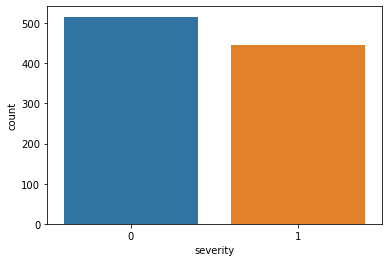

In [28]:
# Graph plot
sns.countplot(mammogram['severity'])

In [10]:
# Setting features variable and target variable
# X -> features that we are working with
# y -> target, in this case is severity
X = mammogram.drop('severity', axis=1)
y = mammogram['severity']

In [17]:
# Splitting the dataset into training and testing set
# Ratio 66% / 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66)
# Observe how many instances for each variable
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(634, 5) (634,)
(327, 5) (327,)


0    182
1    145
Name: severity, dtype: int64

In [306]:
# In testing set, observe number of instances for each class
y_test.value_counts()

0    182
1    145
Name: severity, dtype: int64

D:\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='severity', ylabel='count'>

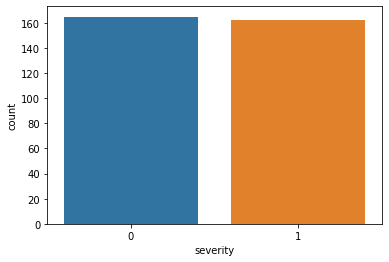

In [16]:
# Graph plot
sns.countplot(y_test)

In [43]:
# Observe 10 samples of training set
X_train[:10]

,BI_RADS_assessment,age,shape,margin,density
876,4.0,41.0,3.0,1.000000,3.000000
275,5.0,71.0,3.0,1.000000,3.000000
750,4.0,64.0,1.0,1.000000,3.000000
711,4.0,19.0,1.0,1.000000,3.000000
507,5.0,49.0,4.0,4.000000,3.000000
240,5.0,72.0,4.0,4.000000,3.000000
738,4.0,53.0,4.0,4.000000,3.000000
262,4.0,40.0,2.0,1.000000,2.910734
100,5.0,59.0,2.0,2.796276,2.910734
847,4.0,19.0,3.0,1.000000,3.000000


In [29]:
# Data Normalization using Min-Max normalization
# Why do we perform normalization after splitting the data?
# -> To avoid data leakage, which means that the created model learns something other than the training set.
# -> This allows the model to learn something it would not learn, and in turn invalidate the accuracy and performance of the model
# Can also be said as: 
# -> The test set is supposed to be a fresh unseen data, and should not be modified at the training stage;
# -> Doing so would cause potential bias in evaluating the performance
normalization = MinMaxScaler()
X_train = normalization.fit_transform(X_train)
X_test = normalization.transform(X_test)

# View first 10 instances of normalized data
X_train[:10]

array([[0.66666667, 0.28205128, 0.66666667, 0.75      , 0.66666667],
       [0.72471324, 0.43589744, 1.        , 0.75      , 0.66666667],
       [0.66666667, 0.66666667, 1.        , 0.25      , 0.33333333],
       [0.5       , 0.28205128, 0.33333333, 0.449069  , 0.66666667],
       [0.66666667, 0.06410256, 0.        , 0.        , 0.66666667],
       [0.66666667, 0.48717949, 1.        , 0.75      , 0.66666667],
       [0.66666667, 0.30769231, 0.33333333, 0.        , 0.66666667],
       [0.66666667, 0.33333333, 1.        , 0.75      , 0.66666667],
       [0.66666667, 0.78205128, 0.        , 0.        , 0.33333333],
       [0.5       , 0.26923077, 0.        , 0.        , 0.66666667]])

In [562]:
# Neural Network
# 1st case
#mlp = MLPClassifier(hidden_layer_sizes=[4], activation='logistic', learning_rate='constant', learning_rate_init=0.8, max_iter=30, solver='sgd', verbose=False, random_state=1)
# 2nd case
# mlp = MLPClassifier(hidden_layer_sizes=[4], activation='logistic', learning_rate='constant', learning_rate_init=0.8, max_iter=50, solver='sgd', verbose=False, random_state=1)
# 3rd case
mlp = MLPClassifier(hidden_layer_sizes=[4], activation='logistic', learning_rate='constant', learning_rate_init=0.50, max_iter=100, \
                    solver='sgd',verbose=True, random_state=1, momentum=0.92)
# 2nd case w/ momentum
# mlp = MLPClassifier(hidden_layer_sizes=4, activation='logistic', learning_rate='constant', learning_rate_init=0.02, max_iter=1000, verbose=False, solver='sgd', momentum=0.25)
# 3rd case w/ adaptive learning rate
# mlp = MLPClassifier(hidden_layer_sizes=5, activation='logistic', learning_rate='adaptive', learning_rate_init=0.02, max_iter=1000)

mlp.fit(X_train, y_train)
predict_mlp = mlp.predict(X_test)

Iteration 1, loss = 0.68910519
Iteration 2, loss = 0.67978038
Iteration 3, loss = 0.65884139
Iteration 4, loss = 0.63114742
Iteration 5, loss = 0.59458076
Iteration 6, loss = 0.54887831
Iteration 7, loss = 0.51547529
Iteration 8, loss = 0.50314005
Iteration 9, loss = 0.49601991
Iteration 10, loss = 0.50164988
Iteration 11, loss = 0.49961226
Iteration 12, loss = 0.49895719
Iteration 13, loss = 0.48164452
Iteration 14, loss = 0.47887126
Iteration 15, loss = 0.47805585
Iteration 16, loss = 0.46808534
Iteration 17, loss = 0.46141974
Iteration 18, loss = 0.45699497
Iteration 19, loss = 0.45592820
Iteration 20, loss = 0.45099469
Iteration 21, loss = 0.44720858
Iteration 22, loss = 0.44873445
Iteration 23, loss = 0.44874369
Iteration 24, loss = 0.44095028
Iteration 25, loss = 0.43869313
Iteration 26, loss = 0.44153397
Iteration 27, loss = 0.43434156
Iteration 28, loss = 0.43565794
Iteration 29, loss = 0.44005496
Iteration 30, loss = 0.43224123
Iteration 31, loss = 0.45636934
Iteration 32, los

In [563]:
# Tengok mse, accuracy & confusion matrix of model 
# Using sklearn classification_report and confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
mse = mean_squared_error(y_test, predict_mlp, squared=True)

print("\nMean Squared Error (MSE): ", mse, "\n")
#print("\t===================================================")
#print(classification_report(y_test, predict_mlp))
#print("\t===================================================")
print(confusion_matrix(y_test, predict_mlp))


Mean Squared Error (MSE):  0.13761467889908258 

[[154  28]
 [ 17 128]]


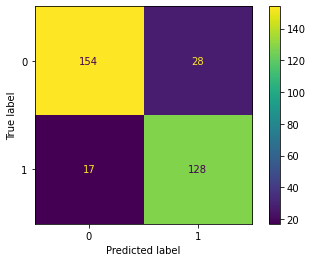

In [564]:
print(plot_confusion_matrix(mlp, X_test, y_test))

In [565]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict_mlp)
print("Model accuracy: ", accuracy, "-> ", round(accuracy*100, 2), " %")

Model accuracy:  0.8623853211009175 ->  86.24  %


0.5
